# Avacado Project

Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

The dataset can be seen in two angles to find the region and find the average price .

Task: One of Classification and other of Regression

Do both tasks in the same .ipynb file and submit at single file. 

In [1]:
!pip install pandas
!pip install numpy
!pip install -U scikit-learn
!pip install matplotlib
!pip install seaborn

You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'C:\Users\anshul\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from math import sqrt
import scipy.stats as stats
from scipy.stats import zscore

from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [10]:
data_1=pd.read_csv(r"D:\Datatrained Project\Avocado\avocado.csv")


In [11]:
data_1.head(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
data_1.tail(5)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [13]:
data_1.shape

(18249, 14)

In [14]:
data_1.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

#As the data has no null value so we don't have to use fillna method

In [15]:
data_1.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,18249.000000,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000
mean,24.232232,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899
std,15.481045,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938
min,0.000000,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000
25%,10.000000,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000
50%,24.000000,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000
75%,38.000000,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000
max,52.000000,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000


relevant column
Some relevant columns in the dataset:
Date - The date of the observation

AveragePrice - the average price of a single avocado

type - conventional or organic

year - the year

Region - the city or region of the observation

Total Volume - Total number of avocados sold

4046 - Total number of avocados with PLU 4046 sold

4225 - Total number of avocados with PLU 4225 sold

4770 - Total number of avocados with PLU 4770 sold

In [21]:
data_1

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...
18244,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,organic,2018,WestTexNewMexico
18245,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,organic,2018,WestTexNewMexico
18246,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,organic,2018,WestTexNewMexico
18247,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,organic,2018,WestTexNewMexico


In [22]:
#finding coorelation
data_1.corr()

,AveragePrice,Total Volume,4046,4225,4770,year
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,0.093197
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.017193
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.003353
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,-0.009559
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,-0.036531
year,0.093197,0.017193,0.003353,-0.009559,-0.036531,1.000000


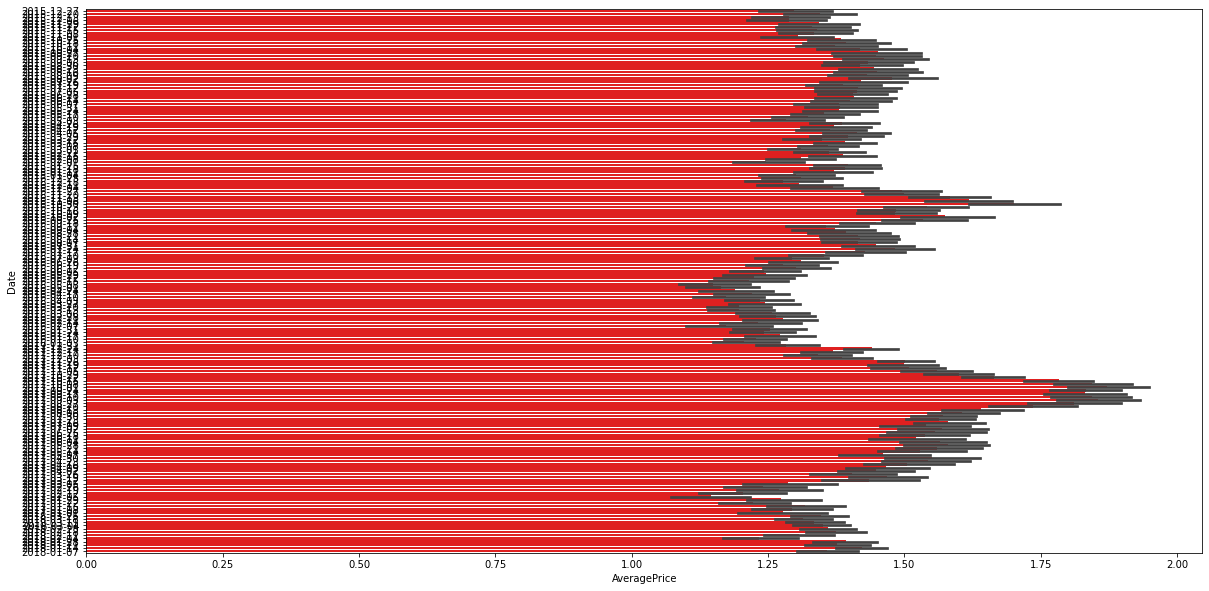

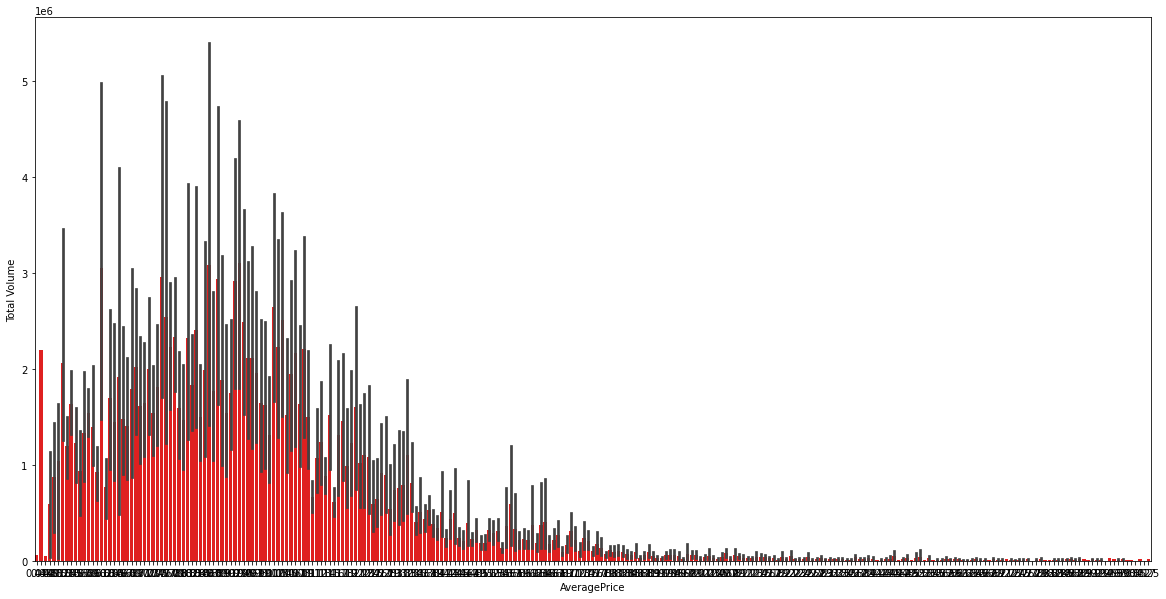

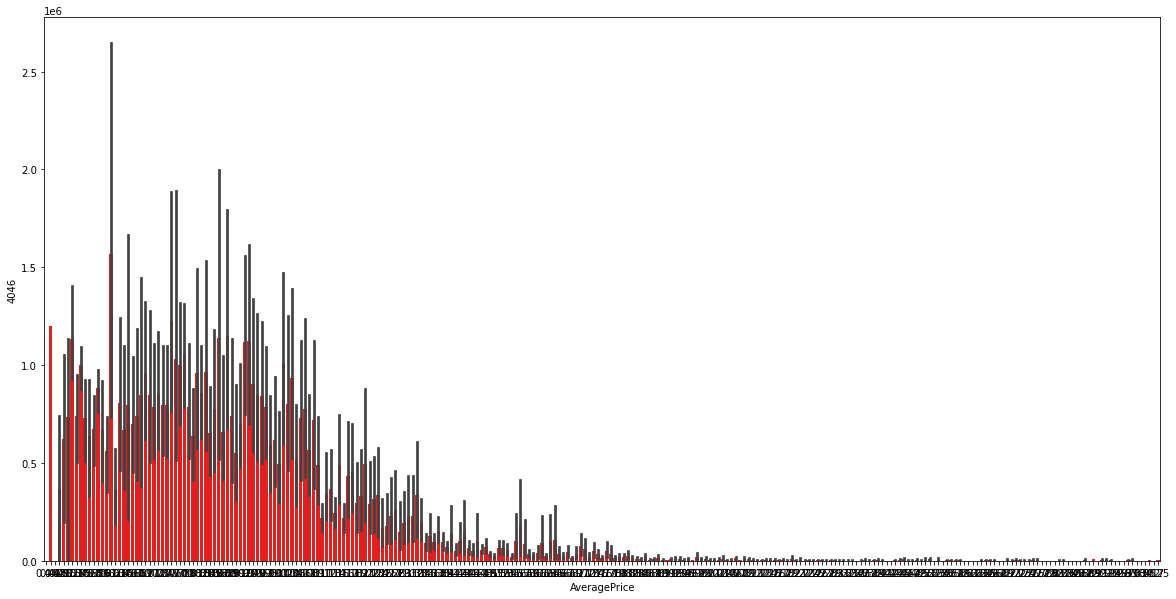

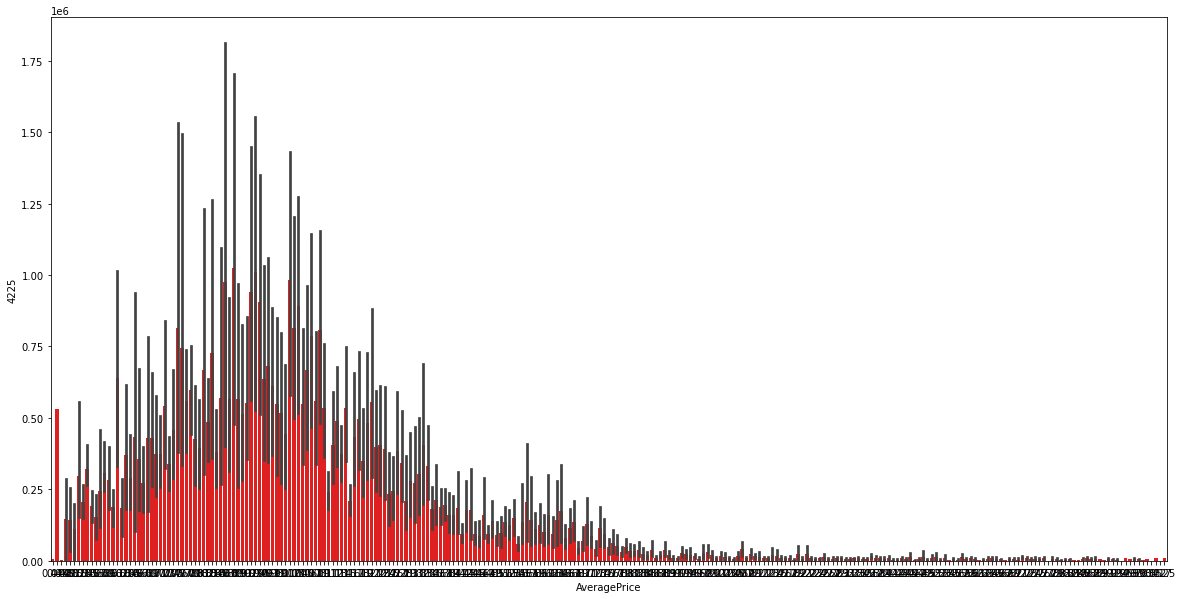

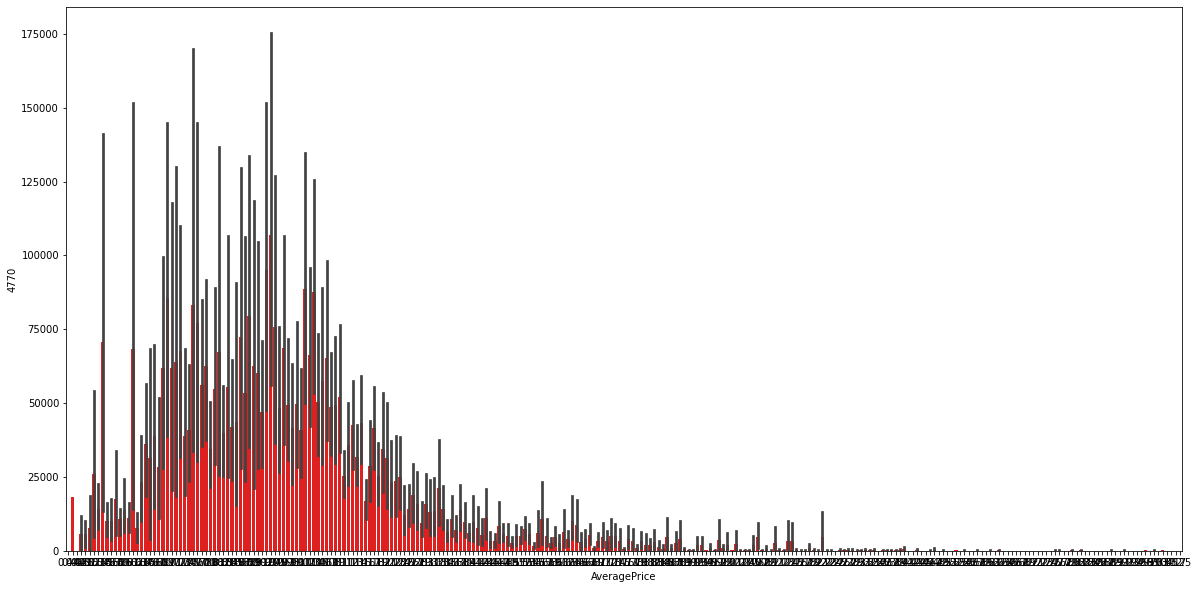

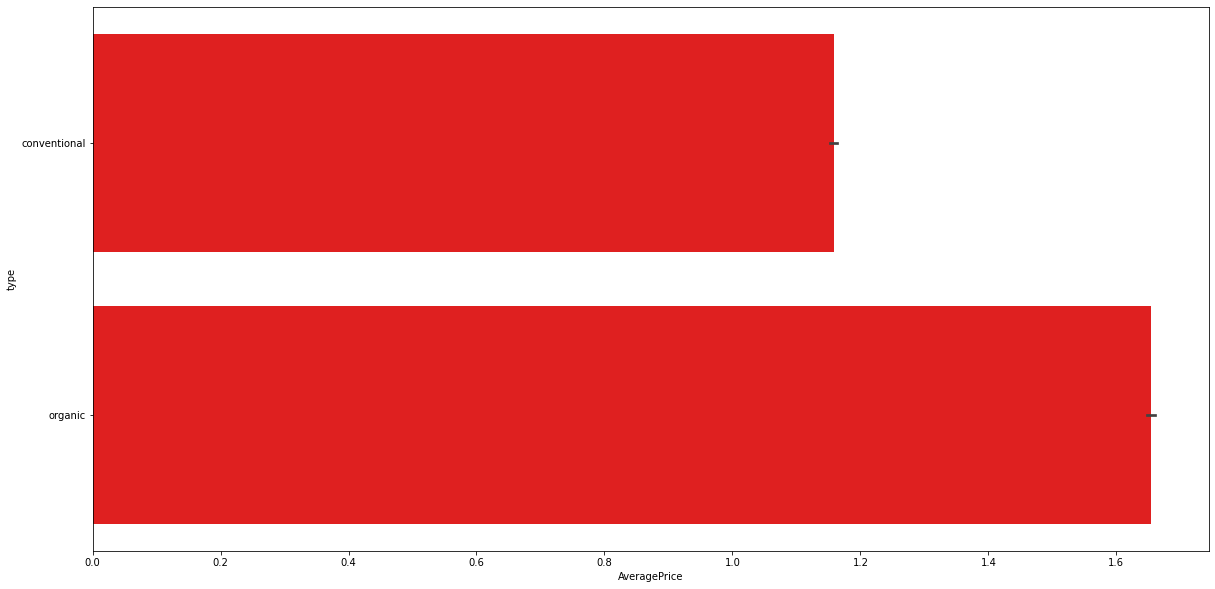

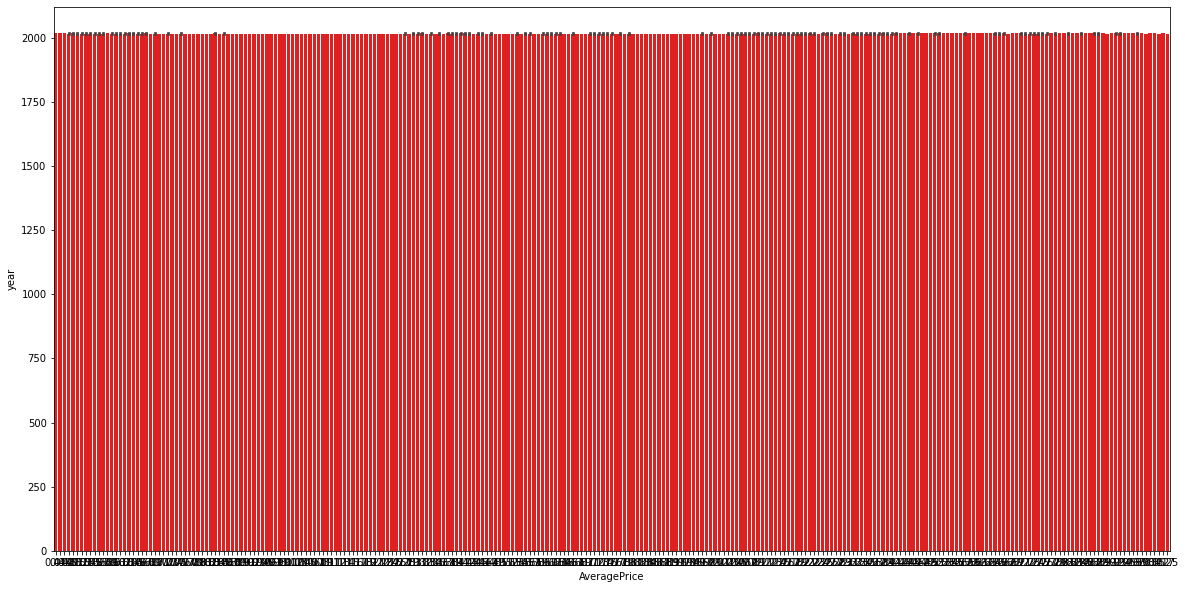

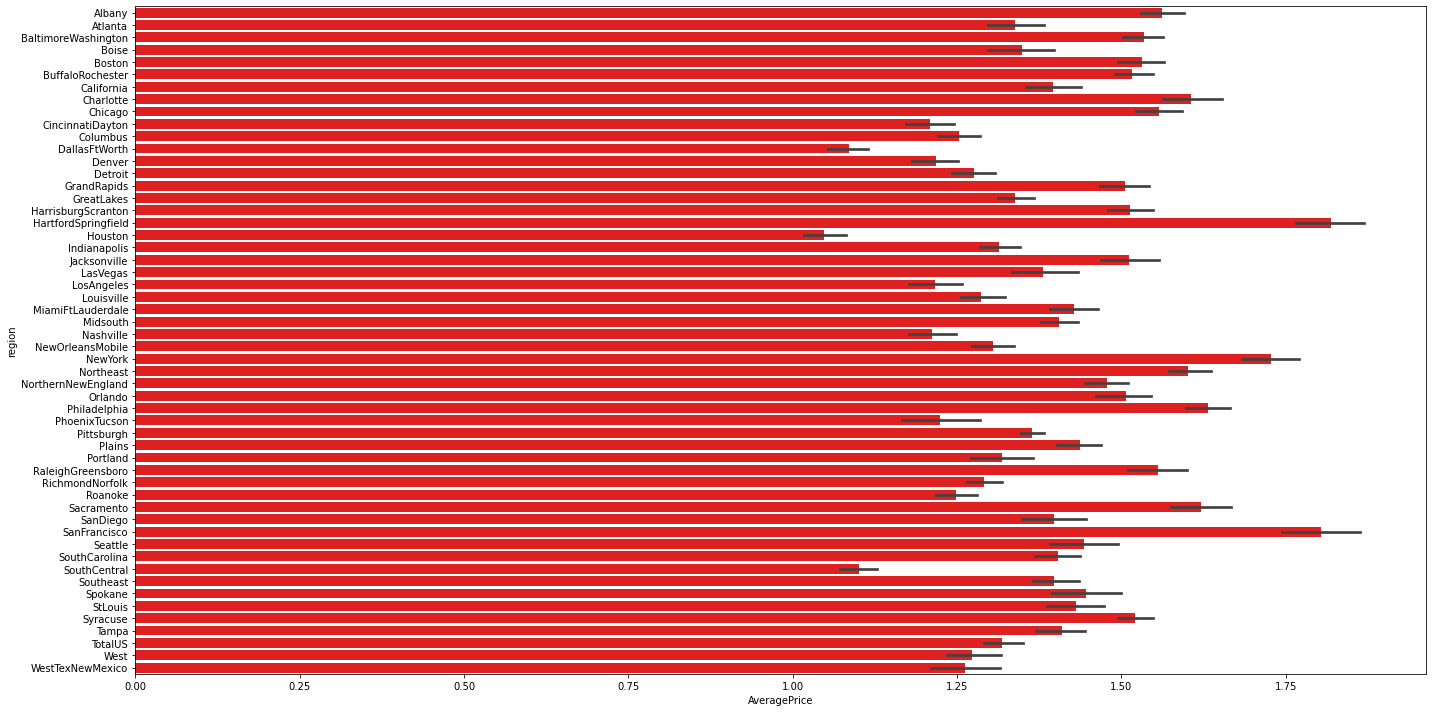

In [25]:
#Let's see with box plot

index=0
labels = data_1['AveragePrice']
features = data_1.drop(['AveragePrice'], axis=1)

for col in features.items():
    plt.figure(figsize=(20,10))
    sns.barplot(x=labels, y=col[index], data=data_1, color="Red")
plt.tight_layout()
plt.show()

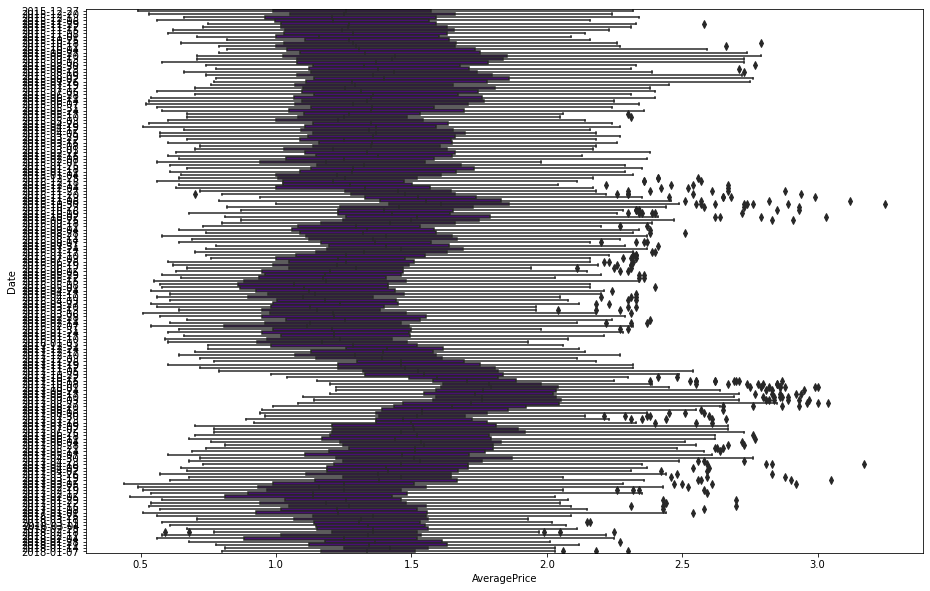

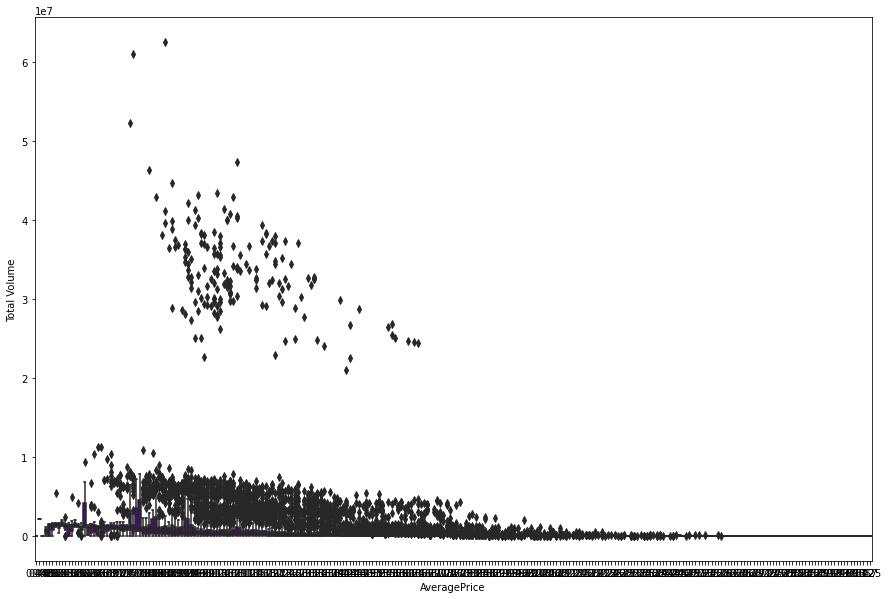

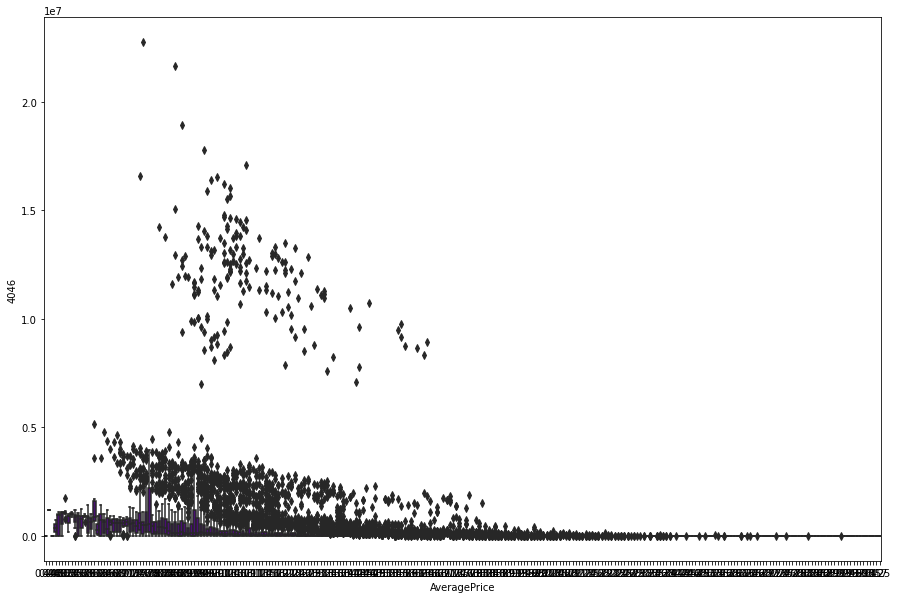

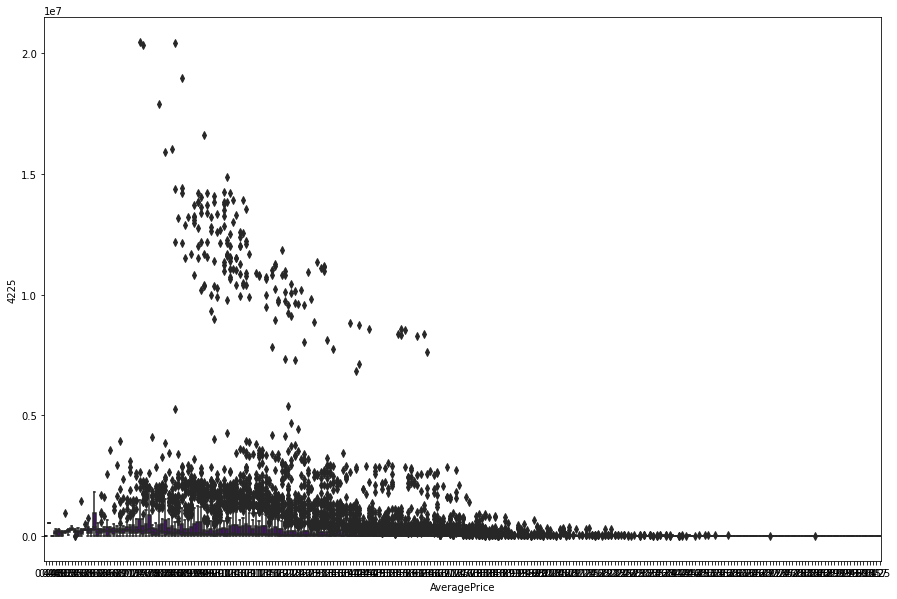

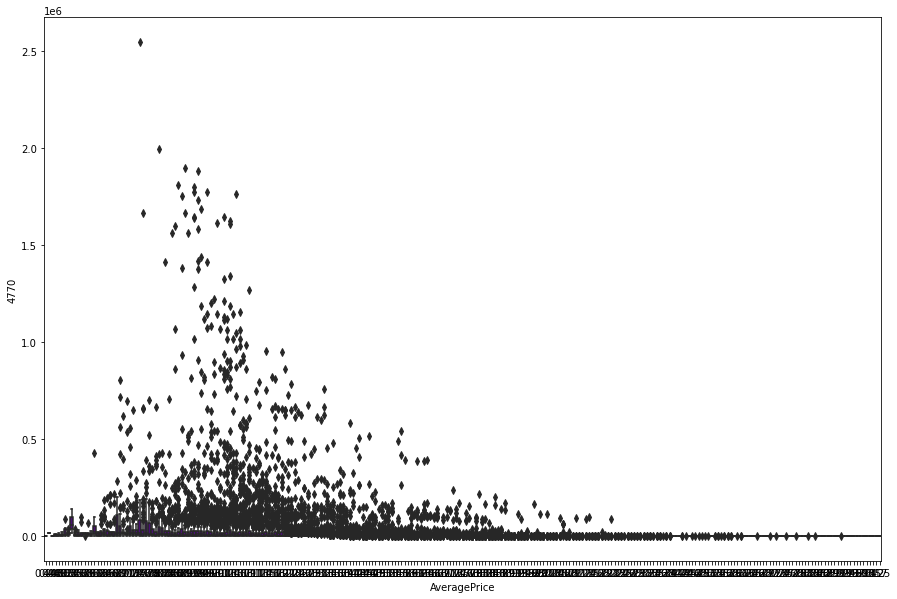

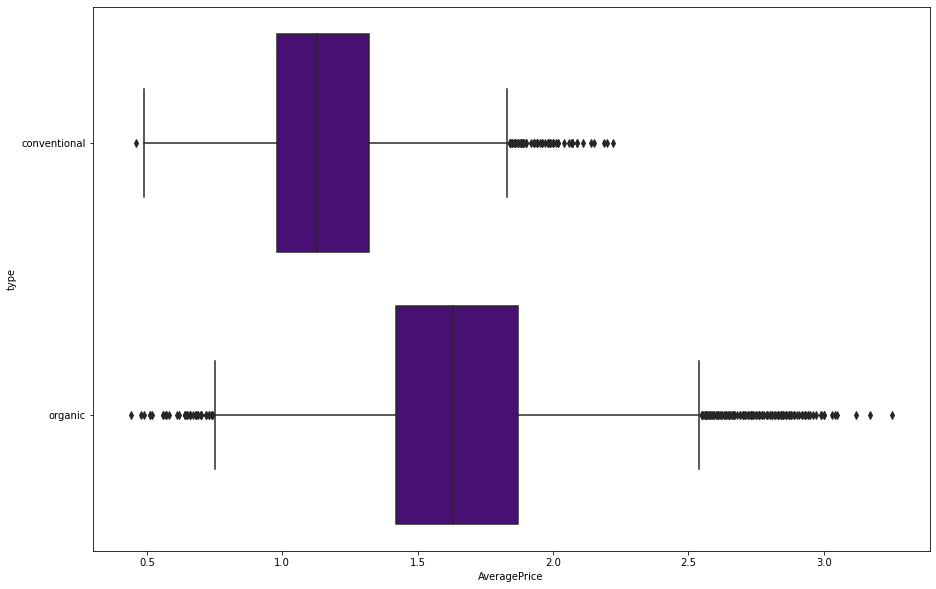

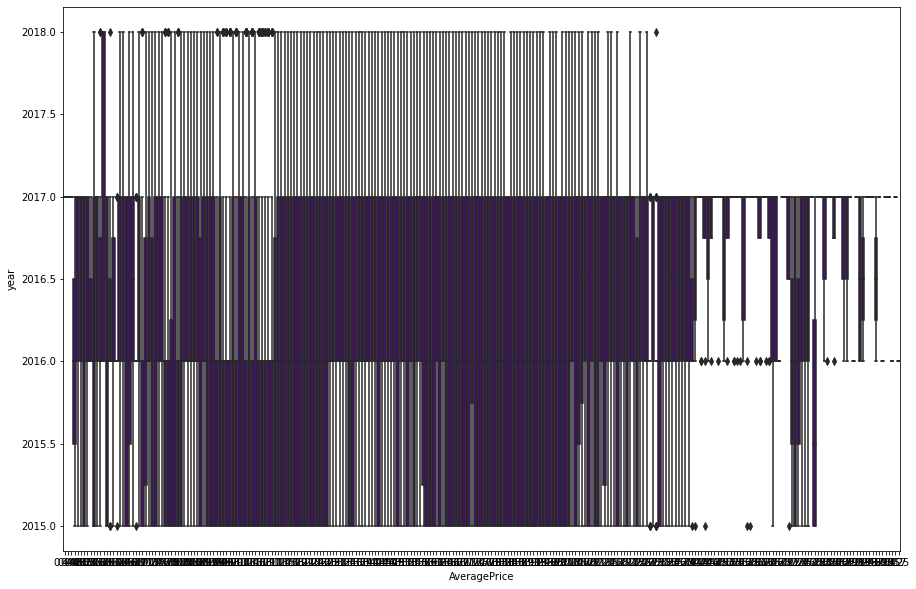

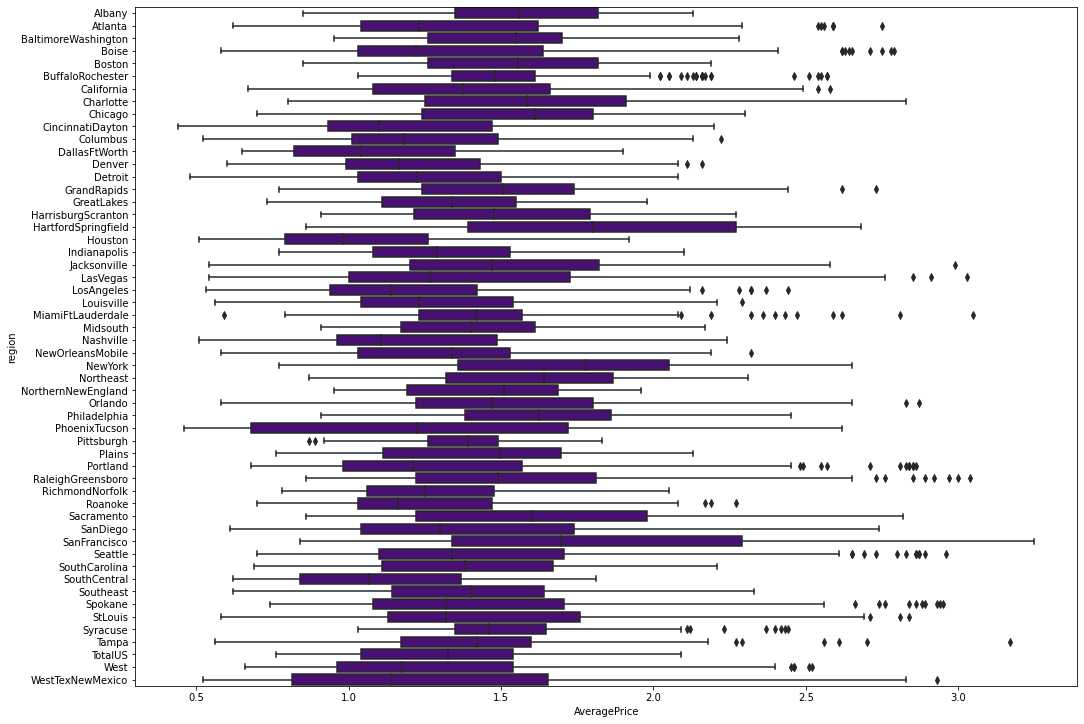

In [26]:
#Box plot
index = 0
for col in features.items():
    plt.figure(figsize=(15,10))
    sns.boxplot(x=labels, y=col[index], data=data_1, color="Indigo")
plt.tight_layout(pad=0.5, w_pad=0.7, h_pad=5.0)
plt.show()

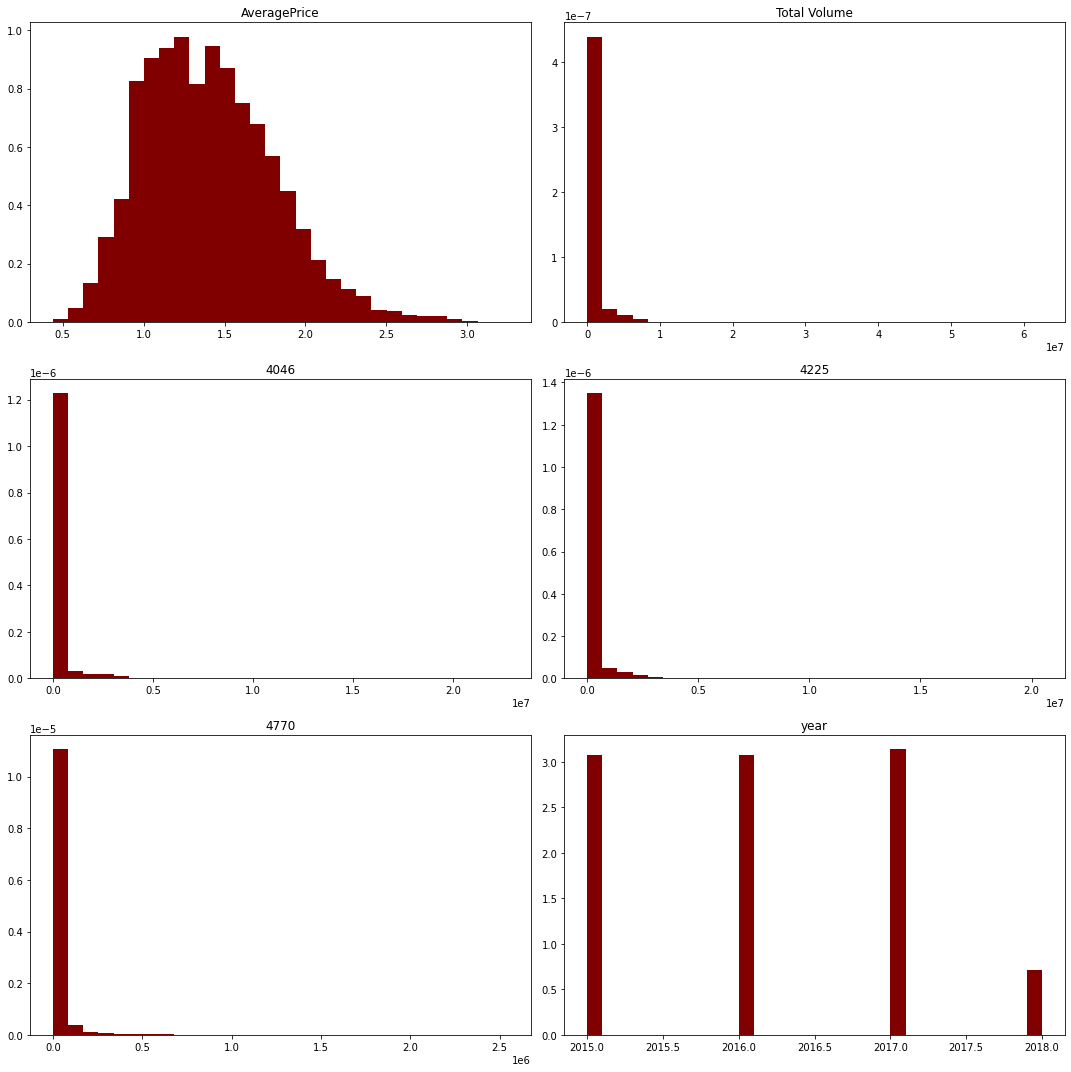

In [28]:
#Histogram
plt.rcParams['figure.figsize'] = (15,15)
data_1.hist(bins=30, color='maroon', density=True, label='Value', histtype='stepfilled', grid=False)
plt.tight_layout()
plt.show()

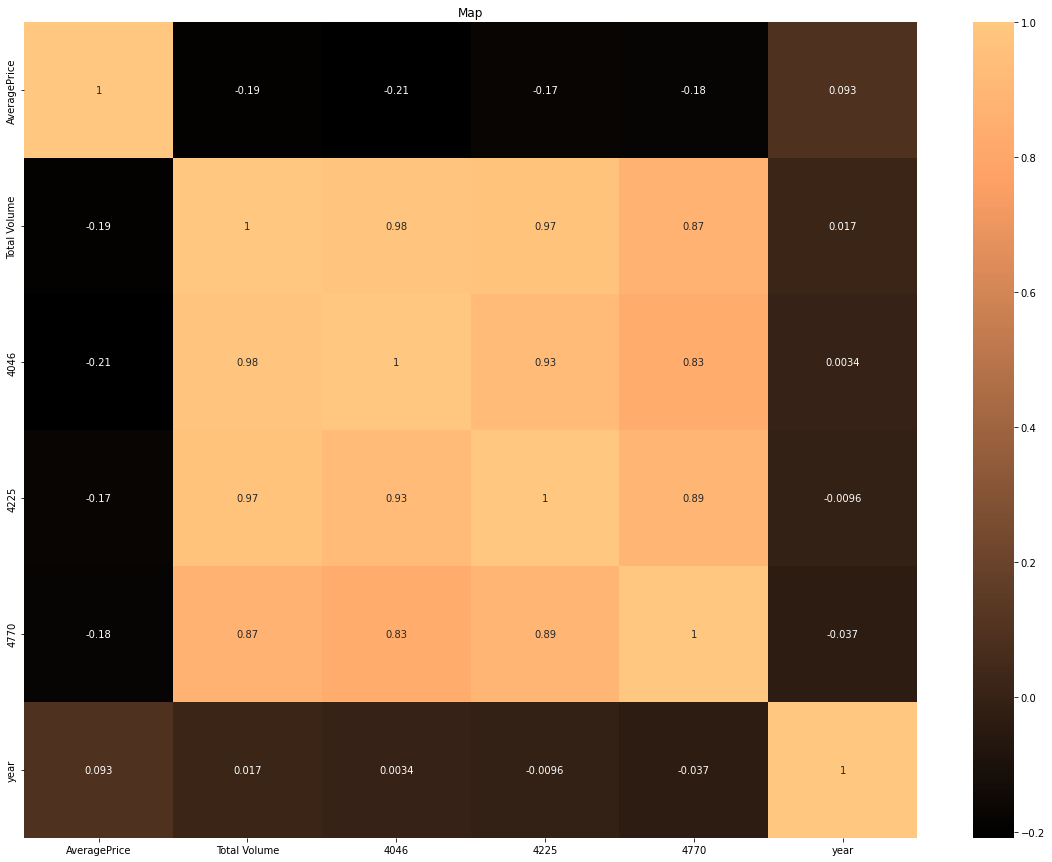

In [29]:
#Heat Map for correlation
# Now we will see the coorelations between the data and the quality 
corr_matrix  =data_1.corr()
#size of the canvas 
plt.rcParams['figure.figsize'] = (20, 15)
#plor the correlation matrix
sns.heatmap(corr_matrix, cmap = 'copper', annot = True)
plt.title('Map')
plt.show()

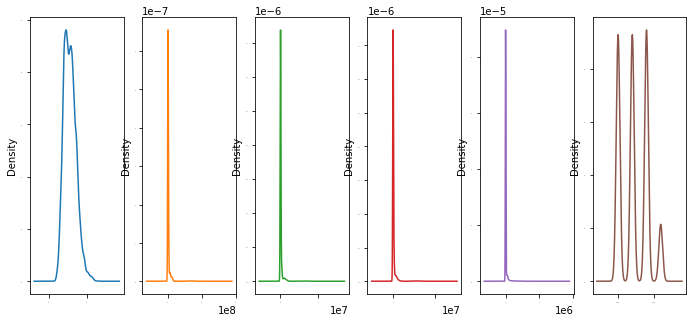

In [30]:
data_1.plot(kind = 'density',subplots = True, layout = (10,20), sharex = False, legend =False ,fontsize =1,figsize=(40,60))
plt.show()

# Data Preprocessing

In [44]:
# converting categorical features of text data into model-understandable numerical data
label_cols = ['type','region']
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
data_1[label_cols] = data_1[label_cols].apply(lambda x : label.fit_transform(x))

In [45]:
# Scaling the features and 
# spliting the label encoded features into distinct features inorder to prevent our model to think that columns have data with some kind of order or hierarchy
# column_tranformer allows us to combine several feature extraction or transformation methods into a single transformer
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
scale_cols = data_1.drop(['AveragePrice','type','year','region'],axis=1)
col_trans = make_column_transformer(
            (OneHotEncoder(), data_1[label_cols].columns),
            (StandardScaler(), scale_cols.columns),
            remainder = 'passthrough')

In [53]:
data_1['Date']=pd.to_datetime(data_1['Date'])
data_1['Month']=data_1['Date'].dt.month
data_1['day']=data_1['Date'].dt.day

In [54]:
data_1.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,day
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,0,2015,0,12,27
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,0,2015,0,12,20
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,0,2015,0,12,13
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,0,2015,0,12,6
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,0,2015,0,11,29


In [56]:
data_1.drop(columns=['Date'],axis=1,inplace=True)

In [57]:
data_1

,AveragePrice,Total Volume,4046,4225,4770,type,year,region,Month,day
0,1.33,64236.62,1036.74,54454.85,48.16,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,0,2015,0,11,29
...,...,...,...,...,...,...,...,...,...,...
18244,1.63,17074.83,2046.96,1529.20,0.00,1,2018,53,2,4
18245,1.71,13888.04,1191.70,3431.50,0.00,1,2018,53,1,28
18246,1.87,13766.76,1191.92,2452.79,727.94,1,2018,53,1,21
18247,1.93,16205.22,1527.63,2981.04,727.01,1,2018,53,1,14


# Train Test Split

In [58]:
# splitting our dataset into train and test set such that 20% of observations are considered as test set
X = data_1.drop(['AveragePrice'],axis=1)
Y = data_1.AveragePrice
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 0)

# Regression Models

In [59]:
def model1(model, X, Y):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=21)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # RMSE - a lower RMSE score is better than a higher one
    rmse = mean_squared_error(Y_test, pred, squared=False)
    print("RMSE Score is:", rmse)
    
    # R2 score
    r2 = r2_score(Y_test, pred, multioutput='variance_weighted')*100
    print("R2 Score is:", r2)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("Cross Validation Score:", cv_score)
    
    # Result of r2 score minus cv score
    result = r2 - cv_score
    print("R2 Score - Cross Validation Score is", result)

In [60]:
#Linear Regression Model
Model=LinearRegression()
model1(Model,X,Y)

RMSE Score is: 0.305540870675188
R2 Score is: 42.74127699046154
Cross Validation Score: 6.357307224724325
R2 Score - Cross Validation Score is 36.38396976573722


In [61]:
# Support Vector Regression

model=SVR(C=1.0, epsilon=0.2, kernel='poly', gamma='auto')
model1(model, X, Y)

RMSE Score is: 1.47287258324837e+42
R2 Score is: -1.3305567133079592e+87
Cross Validation Score: -3.529373312564055e+87
R2 Score - Cross Validation Score is 2.198816599256096e+87


In [62]:
#Decision tree regressor

model=DecisionTreeRegressor()
model1(model,X,Y)

RMSE Score is: 0.1914255819493767
R2 Score is: 77.52482994232592
Cross Validation Score: -26.52437714778356
R2 Score - Cross Validation Score is 104.04920709010949


In [63]:
# Random Forest Regressor

model=RandomForestRegressor(max_depth=2, max_features="sqrt")
model1(model, X, Y)

RMSE Score is: 0.30998790802890763
R2 Score is: 41.06238725181102
Cross Validation Score: 3.3010299299093564
R2 Score - Cross Validation Score is 37.76135732190166


In [64]:
# K Neighbors Regressor

KNeighborsRegressor(n_neighbors=2, algorithm='kd_tree')
model1(model, X, Y)

RMSE Score is: 0.30949471401468315
R2 Score is: 41.24977878275534
Cross Validation Score: 1.7037743615042134
R2 Score - Cross Validation Score is 39.546004421251126


In [65]:
# SGD Regressor

model=SGDRegressor(penalty='l1', max_iter=2000, learning_rate='optimal')
model1(model, X, Y)

RMSE Score is: 2.4974305358050483e+23
R2 Score is: -3.825514649020689e+49
Cross Validation Score: -1.277729042584688e+49
R2 Score - Cross Validation Score is -2.5477856064360013e+49


In [66]:
# Gradient Boosting Regressor

model=GradientBoostingRegressor(loss='quantile', n_estimators=200, max_depth=5)
model1(model, X, Y)

RMSE Score is: 0.29441347921890937
R2 Score is: 46.83590645683757
Cross Validation Score: -20.727583163623983
R2 Score - Cross Validation Score is 67.56348962046155


In [67]:
# Ada Boost Regressor

model=AdaBoostRegressor(n_estimators=300, learning_rate=1.05, random_state=42)
model1(model, X, Y)

RMSE Score is: 0.2981432204578863
R2 Score is: 45.48036860378643
Cross Validation Score: -24.76570059548684
R2 Score - Cross Validation Score is 70.24606919927328


# Hyperparameter Tuning¶

In [68]:
# Choosing Support Vector Regression

fmod_param = {'kernel' : ['poly', 'sigmoid', 'rbf'], 
              'C' : [2.0, 3.0, 4.0], 
              'gamma' : ['scale', 'auto'], 
              'epsilon' : [0.2, 0.3, 0.4], 
              'shrinking' : [True, False]}

In [69]:
GSCV = GridSearchCV(SVR(), fmod_param, cv=5)

In [70]:
Final_Model = SVR(C=4.0, epsilon=0.4, gamma='scale', kernel='rbf', shrinking=True)
Classifier = Final_Model.fit(X_train, Y_train)
fmod_pred = Final_Model.predict(X_test)
fmod_r2 = r2_score(Y_test, fmod_pred, multioutput='variance_weighted')*100
print("R2 score for the Best Model is:", fmod_r2)

R2 score for the Best Model is: 33.6156908612181


# Saving the model¶

In [71]:
filename = "FinalModel_4.pkl"
joblib.dump(Final_Model, filename)

['FinalModel_4.pkl']